## PROBLEM SET 1 - TAKE AT HOME (25 POINTS)

**You will lose all corresponding points if we can't access the implementation notebook URL or the Github URL. We will NOT message you. Do NOT invite the TAs to your Github repo (option 2 below) EARLIER than the morning of the day of the exam, since invites expire in 7 days.** 

## Introduction

In the last few years, the field of generative modeling has seen a lot of progress. The techniques that have been developed in this field are very useful for other tasks such as semi-supervised learning, representation learning, and reinforcement learning. In this problem statement we attempt to prepare you to understand the basics of a technique that has been very successful in generative modeling: Variational Autoencoders (VAEs). Understanding VAEs is  the key for you to get a head start with more advanced models such as [Stable Diffusion that are all the rage these days](https://clipdrop.co/stable-diffusion-turbo). 



## Task 1: Study what VAEs are and how they work (0 points)

Consult this [blog post](https://jaan.io/what-is-variational-autoencoder-vae-tutorial/) and its [2D VAE autoencoder implemenation for the MNIST dataset](https://github.com/jaanli/variational-autoencoder). 

## Task 2: Replicate the VAE for the MNIST dataset (25 points)

Implement the VAE model for the MNIST dataset and train it ensuring that you plot the loss curves for the training and validation sets and perform hyperparameter optimization on the size of the latent space as well as on the optimizer parameters. To all points you need to include as comments in the code or as markdown cells what each function in the code is doing. Don't be frugal in your commentary. (15 points)

Replicate the figure showing the final latent variable space shown below. Note that you will not produce the animated figure shown below but show only the final latent space $(z_1, z_2)$. (5 points)

Show VAE generated images for all digits 0-9 after model training. (5 points)

![](latent-variables.gif)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 2176/60000 [>.............................] - ETA: 5s - loss: 351.8503  

2023-12-15 23:10:04.958601: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
2023-12-15 23:10:04.976692: W tensorflow/c/c_api.cc:305] Operation '{name:'training/RMSprop/dense_114/bias/rms/Assign' id:441 op device:{requested: '', assigned: ''} def:{{{node training/RMSprop/dense_114/bias/rms/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training/RMSprop/dense_114/bias/rms, training/RMSprop/dense_114/bias/rms/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


60000/60000 [==============================] - 2s 31us/sample - loss: 194.7803 - val_loss: 174.8354
Epoch 2/50
 1152/60000 [..............................] - ETA: 2s - loss: 175.3366

/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2023-12-15 23:10:06.698504: W tensorflow/c/c_api.cc:305] Operation '{name:'loss/mul' id:178 op device:{requested: '', assigned: ''} def:{{{node loss/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss/mul/x, loss/dense_116_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


60000/60000 [==============================] - 2s 27us/sample - loss: 172.7237 - val_loss: 169.6634
Epoch 3/50
60000/60000 [==============================] - 2s 27us/sample - loss: 168.3482 - val_loss: 166.5452
Epoch 4/50
60000/60000 [==============================] - 2s 28us/sample - loss: 165.3684 - val_loss: 164.4287
Epoch 5/50
60000/60000 [==============================] - 2s 28us/sample - loss: 163.4138 - val_loss: 162.6563
Epoch 6/50
60000/60000 [==============================] - 2s 28us/sample - loss: 162.2027 - val_loss: 161.6753
Epoch 7/50
60000/60000 [==============================] - 2s 28us/sample - loss: 161.3522 - val_loss: 160.8465
Epoch 8/50
60000/60000 [==============================] - 2s 28us/sample - loss: 160.6486 - val_loss: 160.5332
Epoch 9/50
60000/60000 [==============================] - 2s 28us/sample - loss: 160.0446 - val_loss: 160.0900
Epoch 10/50
60000/60000 [==============================] - 2s 28us/sample - loss: 159.5030 - val_loss: 159.9858
Epoch 11/50

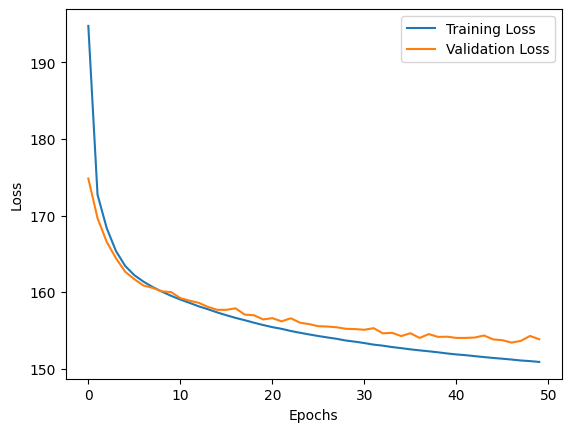

/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2023-12-15 23:11:29.237783: W tensorflow/c/c_api.cc:305] Operation '{name:'dense_113/BiasAdd' id:49 op device:{requested: '', assigned: ''} def:{{{node dense_113/BiasAdd}} = BiasAdd[T=DT_FLOAT, _has_manual_control_dependencies=true, data_format="NHWC"](dense_113/MatMul, dense_113/BiasAdd/ReadVariableOp)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


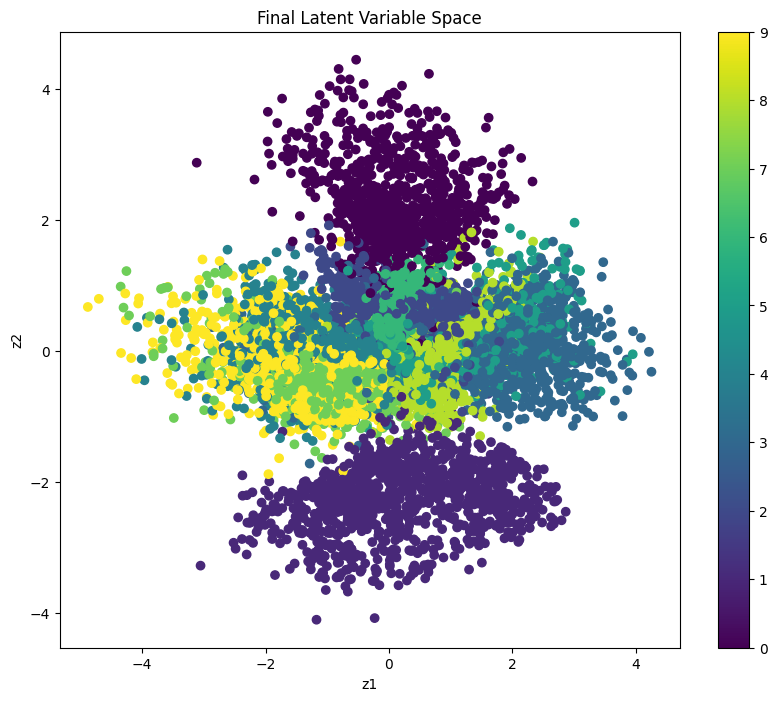

2023-12-15 23:11:29.513057: W tensorflow/c/c_api.cc:305] Operation '{name:'dense_116_1/Sigmoid' id:189 op device:{requested: '', assigned: ''} def:{{{node dense_116_1/Sigmoid}} = Sigmoid[T=DT_FLOAT, _has_manual_control_dependencies=true](dense_116_1/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


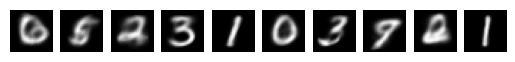

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras import backend as K
from keras import losses
from keras.datasets import mnist
from keras import optimizers
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()

# Load the MNIST dataset
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()

# Normalize pixel values between 0 and 1
xTrain = xTrain.astype('float32') / 255.0
xTest = xTest.astype('float32') / 255.0

# Flatten images to 1D array
originalDim = 28 * 28
xTrain = xTrain.reshape((len(xTrain), originalDim))
xTest = xTest.reshape((len(xTest), originalDim))

# Define the VAE architecture
def createVae(input_dim, latent_dim):
    # Encoder network
    inputs = Input(shape=(input_dim,))
    h = Dense(256, activation='relu')(inputs)
    z_mean = Dense(latent_dim)(h)
    z_log_var = Dense(latent_dim)(h)

    # Reparameterization trick to sample from the latent space
    def sampling(args):
        z_mean, z_log_var = args
        batch = K.shape(z_mean)[0]
        dim = K.int_shape(z_mean)[1]
        epsilon = K.random_normal(shape=(batch, dim))
        return z_mean + K.exp(0.5 * z_log_var) * epsilon

    z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

    # Decoder network
    decoder_h = Dense(256, activation='relu')
    decoder_mean = Dense(input_dim, activation='sigmoid')
    h_decoded = decoder_h(z)
    x_decoded_mean = decoder_mean(h_decoded)

    # Define the custom loss function for VAE
    def vaeLoss(x, x_decoded_mean):
        xent_loss = originalDim * losses.binary_crossentropy(x, x_decoded_mean)
        kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
        return xent_loss + kl_loss

    # Build and compile the VAE model
    vae = Model(inputs, x_decoded_mean)
    vae.compile(optimizer='rmsprop', loss=vaeLoss)

    # Encoder model, used for inference
    encoder = Model(inputs, [z_mean, z_log_var])

    # Generator model, generates new samples from latent space
    decoder_input = Input(shape=(latent_dim,))
    hDecodedd = decoder_h(decoder_input)
    xDecodedMeann = decoder_mean(hDecodedd)
    generator = Model(decoder_input, xDecodedMeann)

    return vae, encoder, generator

# Set random seed for reproducibility
np.random.seed(100)

# Hyperparameters
input_dim = 784  # 28*28
latent_dim = 2   # Set the latent space size
epochs = 50
batch_size = 128

# Create VAE model
vae, encoder, generator = createVae(input_dim, latent_dim)

# Train the VAE model
history = vae.fit(xTrain, xTrain,
    shuffle=True,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(xTest, xTest))

# Plot the training and validation loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Replicate the figure showing the final latent variable space
z_test, _ = encoder.predict(xTest, batch_size=batch_size)
plt.figure(figsize=(10, 8))
plt.scatter(z_test[:, 0], z_test[:, 1], c=yTest, cmap='viridis')
plt.colorbar()
plt.xlabel('z1')
plt.ylabel('z2')
plt.title('Final Latent Variable Space')
plt.show()

# Generate new images for all digits 0-9
num_samples = 10
for digit in range(10):
    # Sample from the latent space for each digit
    z_sample = np.array([[np.random.normal(), np.random.normal()]])
    generated_digit = generator.predict(z_sample)
    
    # Reshape and plot the generated image
    generated_digit = generated_digit.reshape(28, 28)
    plt.subplot(1, 10, digit + 1)
    plt.imshow(generated_digit, cmap='gray')
    plt.axis('off')

plt.show()

You have two implementation options: (1) All in one notebook (2) Github repo. 

### Option 1: All in one Colab notebook

You submit a single Colab notebook URL that contains all the code and the outputs. Your notebook should be self-contained and can be launched in Google Colab using a corresponding button at the top of the notebook. See the regression notebook in the course site for an example of such button. You **need to save all outputs in the notebook** so that the TAs can check that your code is working properly. 

### Option 2: Github repo 

If you prefer to work without notebooks, with containers or not, you can submit the implementation python scripts and version control your code in a private Github repo. You have to submit the Github URL and clearly document the way to launch the runtime / install requirements.txt and include all required figures in the README.md file. 

IMPORTANT: Ensure that the github repo remains private. If you submit a public github repo you will be held responsible for violating the honor code.